In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Import Data

In [2]:
data_dir = '../data/'
train_file = data_dir + 'sales_train.csv'
test_file = data_dir + 'test.csv'
item_file = data_dir + 'items.csv'
item_category_file = data_dir + 'item_categories.csv'
shop_file = data_dir + 'shops.csv'

train = pd.read_csv(train_file)
test = pd.read_csv(test_file)
items = pd.read_csv(item_file)
shops = pd.read_csv(shop_file)
item_cats = pd.read_csv(item_category_file)

In [3]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


# Look for outliers

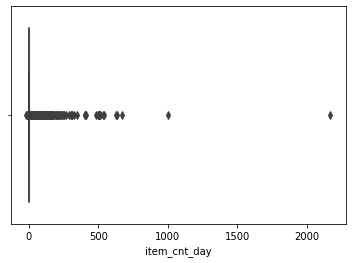

In [5]:
sns.boxplot(train['item_cnt_day'])

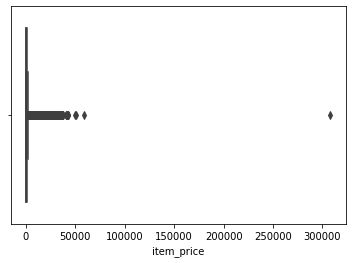

In [6]:
sns.boxplot(train['item_price'])

In [7]:
train = train[train['item_price'] < 100000]
train = train[train['item_cnt_day'] < 1000]

# Find negative prices

In [8]:
train_neg = train[train['item_price'] < 0]

In [9]:
tmp_mean = train[(train['date_block_num'] == 4) & (train['item_id'] == 2973) & (train['item_price'] > 0) & (train['shop_id'] == 32)].mean()

In [10]:
train.loc[train['item_price'] < 0, 'item_price'] = tmp_mean

# Duplicate Shops

In [11]:
train.loc[train['shop_id'] == 0, 'shop_id'] = 57
test.loc[test['shop_id'] == 0, 'shop_id'] = 57

train.loc[train['shop_id'] == 1, 'shop_id'] = 58
test.loc[test['shop_id'] == 1, 'shop_id'] = 58

train.loc[train['shop_id'] == 10, 'shop_id'] = 11
test.loc[test['shop_id'] == 10, 'shop_id'] = 11


# Group by month, shop and item

In [12]:
grouped_train = train.groupby(['date_block_num', 'shop_id','item_id'])['date','item_price', 'item_cnt_day'].agg({'date' : ['min','max'], 'item_price' : 'mean', 'item_cnt_day':'sum'})

<ipython-input-12-5d77f81c1081>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_train = train.groupby(['date_block_num', 'shop_id','item_id'])['date','item_price', 'item_cnt_day'].agg({'date' : ['min','max'], 'item_price' : 'mean', 'item_cnt_day':'sum'})


In [24]:
tmp

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0
